<a href="https://colab.research.google.com/github/rsgirishkumar/SM5083/blob/main/BOP_ASS2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[0 4]
[-4  0]
[-2.  1.] [2. 1.]
[-2.  2.] [2. 2.] [ 2. -2.] [-2. -2.]
[ 0 -1] [-2.  1.] [-2.  2.]
[-1  0]
[-1  0] [[-2.]
 [ 2.]]
[2.]
[-2.  1.] [0 3] [2. 2.]
[1. 2.]
[1. 2.] [[2.]
 [2.]]
[6.]
[0 3] [2. 1.] [ 2. -2.]
[3 0]
[3 0] [[ 2.]
 [-2.]]
[6.]
[2. 1.] [ 0 -1] [-2. -2.]
[ 1. -2.]
[ 1. -2.] [[-2.]
 [-2.]]
[2.]
2.0x+2.0y+2.0=0
2.0x+-2.0y+6.0=0
-2.0x+-2.0y+6.0=0
-2.0x+2.0y+2.0=0


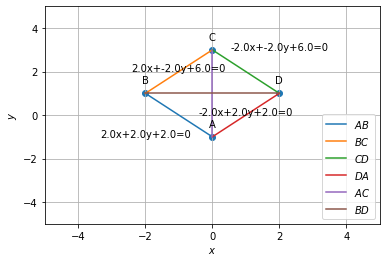

In [1]:

#Question: The opposite vertices of a sqaure are (0,-1), (0,3). Find the equations of four sides.
import matplotlib.pyplot as plt
import math
import numpy as np
from numpy.linalg import norm


# Generate line points
def line_gen(A, B):
    len = 10
    dim = A.shape[0]
    x_AB = np.zeros((dim, len))
    lam_1 = np.linspace(0, 1, len)
    for i in range(len):
        temp1 = A + lam_1[i] * (B - A)
        x_AB[:, i] = temp1.T
    return x_AB

#orthogonal matrix
omat = np.array([[0,1],[-1,0]])
# GIVEN POINTS

a = np.array([0,-1])
c = np.array([0,3])
#x_AC = line_gen(a,c)
#print(x_AC)
#Direction Vector
x_AC = c-a
x_BD = x_AC @ omat
print(x_AC)
#The vector which is orthogonal to x_ac is another diagonal and that vector is given by the transpose of vector array. Hence
#x_bd = np.vstack(x_ac)
print(x_BD)
# MIDPOINT OF DIAGONAL
mp = np.array([(a[0]+c[0])/2,(a[1]+c[1])/2])
#print(mp)
#Other unknown coordinates
#dist_ac = norm(c-a)
len_bd = norm(x_BD)
#print(len_bd)
#LET MIDPOINT BE vector MP  and denoted by M
#SINCE vector AC is a diagonal, AC= AM+MC. SIMILARLY BD= BM+MD
b=np.array([mp[0]+ x_BD[0]/2,mp[1]+x_BD[1]/2])
d=np.array([mp[0]-x_BD[0]/2, mp[1]-x_BD[1]/2])
print(b,d)
x_AB = b-a
x_BC = c-b
x_CD = d-c
x_DA = a-d

# Direction Vectors
print(x_AB, x_BC, x_CD, x_DA)
#print(np.flip(x_AB))
#e=np.array([[1],[3]])
#print(np.shape(e))
# EQUATIONS OF A LINE GENERATION
'''
WHEN TWO COORDINATES (X1 Y1) AND (X2 Y2) ARE GIVEN, THEN THE LINE EQUATION IS GIVEN BY 
(Y-Y1)/(Y2-Y1) = (X-X1)/(X2-X1)
AND IN THE FORM AX+BY+C = 0, A= Y2-Y1, B=X1-X2, C=(-(Y2-Y1)*X1)+((X2-X1)*Y1) 
IN MATRIX FORM PT1 = ([X1,Y1]), PT2 = ([X2,Y2]) AND DIRECTIONAL VECTOR DV1 = PT2 - PT1 =([X2-X1, Y2-Y1]) THEN 
A= DV1[1], B=-DV1[0], C = [PT1[1],-PT[0]]@DV1.T
'''
#DEFINITION OF FUNCTION FOR COEFFICIENTS OF EQUATION GENERATION
def coeff_gen(A,B,AB):
    print(A,B,AB)
    A_prime = np.array([A[1],-A[0]])
    print(A_prime)
    coeff_a = AB[1]
    coeff_b = -AB[0]
    AB_prime = np.array([AB])
    print(A_prime,np.transpose(AB_prime))
    coeff_c = np.matmul(A_prime, np.transpose(AB_prime))
    print(coeff_c)
    coeff_mat = np.array([coeff_a, coeff_b, coeff_c[0]])
    return coeff_mat
#CONTROL FOR COEFFICIENTS
line_ab_coeff = coeff_gen(a,b,x_AB)
line_bc_coeff = coeff_gen(b,c,x_BC)
line_cd_coeff = coeff_gen(c,d,x_CD)
line_da_coeff = coeff_gen(d,a,x_DA)
#EQUATION STRING FORMATION FOR DISPLAY
eqn_ab = str(line_ab_coeff[0])+'x+'+str(line_ab_coeff[1])+'y+'+str(line_ab_coeff[2])+'=0'
eqn_bc = str(line_bc_coeff[0])+'x+'+str(line_bc_coeff[1])+'y+'+str(line_bc_coeff[2])+'=0'
eqn_cd = str(line_cd_coeff[0])+'x+'+str(line_cd_coeff[1])+'y+'+str(line_cd_coeff[2])+'=0'
eqn_da = str(line_da_coeff[0])+'x+'+str(line_da_coeff[1])+'y+'+str(line_da_coeff[2])+'=0'

print(eqn_ab)
print(eqn_bc)
print(eqn_cd)
print(eqn_da)
'''
print(line_ab_coeff)
print(line_bc_coeff)
print(line_cd_coeff)
print(line_da_coeff)
'''
# LINE GENERATIONS FOR PLOT

# SIDES OF A SQUARE - LINE POINTS GENERATION

x_ab = line_gen(a, b)
#print(x_ab)
x_bc = line_gen(b, c)
x_cd = line_gen(c, d)
x_da = line_gen(d, a)

# DIAGONALS OF SQUARE - LINE POINTS GENERATION

x_ac = line_gen(a, c)
x_bd = line_gen(b, d)

# PLOTTING THE LINES

plt.plot(x_ab[0, :], x_ab[1, :], label="$AB$")
plt.plot(x_bc[0, :], x_bc[1, :], label="$BC$")
plt.plot(x_cd[0, :], x_cd[1, :], label="$CD$")
plt.plot(x_da[0, :], x_da[1, :], label="$DA$")
plt.plot(x_ac[0, :], x_ac[1, :], label="$AC$")
plt.plot(x_bd[0, :], x_bd[1, :], label="$BD$")

# ANNOTATIONS IN GRAPH
quad_coords = np.vstack((a, b, c, d)).T
plt.scatter(quad_coords[0, :], quad_coords[1, :])
vert_labels = ['A', 'B', 'C', 'D']
eqn_labels = [eqn_ab,eqn_bc,eqn_cd, eqn_da]
for i, txt in enumerate(vert_labels):
    plt.annotate(txt,  # this is the text
                 (quad_coords[0, i], quad_coords[1, i]),  # this is the point to label
                 textcoords="offset points",  # how to position the text
                 xytext=(0, 10),  # distance from text to points (x,y)
                 ha='center')  # horizontal alignment can be left, right or center

quad_coords = np.vstack((((a+b)/2)-1,((b+c)/2),((c+d)/2)+1,((d+a)/2))).T
for i, txt in enumerate(eqn_labels):
    plt.annotate(txt,  # this is the text
                 (quad_coords[0, i], quad_coords[1, i]),  # this is the point to label
                 textcoords="offset points",  # how to position the text
                 xytext=(0,0),  # distance from text to points (x,y)
                 ha='center')  # horizontal alignment can be left, right or center

plt.xlabel('$x$')
plt.ylabel('$y$')
plt.legend(loc='lower right')
plt.grid()
plt.xlim(-5, 5)
plt.ylim(-5, 5)
plt.savefig('assignment2.png')
plt.show()


# New Section

\documentclass[journal,12pt,twocolumn]{IEEEtran}
%
\usepackage{setspace}
\usepackage{gensymb}
%\doublespacing
\singlespacing

%\usepackage{graphicx}
%\usepackage{amssymb}
%\usepackage{relsize}
\usepackage[cmex10]{amsmath}
%\usepackage{amsthm}
%\interdisplaylinepenalty=2500
%\savesymbol{iint}
%\usepackage{txfonts}
%\restoresymbol{TXF}{iint}
%\usepackage{wasysym}
\usepackage{amsthm}
\usepackage{mathrsfs}
\usepackage{txfonts}
\usepackage{stfloats}
\usepackage{steinmetz}
\usepackage{bm}
\usepackage{cite}
\usepackage{cases}
\usepackage{subfig}
%\usepackage{xtab}
\usepackage{longtable}
\usepackage{multirow}
%\usepackage{algorithm}
%\usepackage{algpseudocode}
\usepackage{enumitem}
\usepackage{mathtools}
\usepackage{tikz}
\usepackage{circuitikz}
\usepackage{verbatim}
\usepackage{tfrupee}
\usepackage[breaklinks=true]{hyperref}
%\usepackage{stmaryrd}
\usepackage{tkz-euclide} % loads  TikZ and tkz-base
%\usetkzobj{all}
\usepackage{listings}
    \usepackage{color}                                            %%
    \usepackage{array}                                            %%
    \usepackage{longtable}                                        %%
    \usepackage{calc}                                             %%
    \usepackage{multirow}                                         %%
    \usepackage{hhline}                                           %%
    \usepackage{ifthen}                                           %%
  %optionally (for landscape tables embedded in another document): %%
    \usepackage{lscape}     
\usepackage{multicol}
\usepackage{chngcntr}
%\usepackage{enumerate}

%\usepackage{wasysym}
%\newcounter{MYtempeqncnt}
\DeclareMathOperator*{\Res}{Res}
%\renewcommand{\baselinestretch}{2}
\renewcommand\thesection{\arabic{section}}
\renewcommand\thesubsection{\thesection.\arabic{subsection}}
\renewcommand\thesubsubsection{\thesubsection.\arabic{subsubsection}}

\renewcommand\thesectiondis{\arabic{section}}
\renewcommand\thesubsectiondis{\thesectiondis.\arabic{subsection}}
\renewcommand\thesubsubsectiondis{\thesubsectiondis.\arabic{subsubsection}}

% correct bad hyphenation here
\hyphenation{op-tical net-works semi-conduc-tor}
\def\inputGnumericTable{}                                 %%

\lstset{
%language=C,
frame=single, 
breaklines=true,
columns=fullflexible
}
%\lstset{
%language=tex,
%frame=single, 
%breaklines=true
%}

\begin{document}
%


\newtheorem{theorem}{Theorem}[section]
\newtheorem{problem}{Problem}
\newtheorem{proposition}{Proposition}[section]
\newtheorem{lemma}{Lemma}[section]
\newtheorem{corollary}[theorem]{Corollary}
\newtheorem{example}{Example}[section]
\newtheorem{definition}[problem]{Definition}
%\newtheorem{thm}{Theorem}[section] 
%\newtheorem{defn}[thm]{Definition}
%\newtheorem{algorithm}{Algorithm}[section]
%\newtheorem{cor}{Corollary}
\newcommand{\BEQA}{\begin{eqnarray}}
\newcommand{\EEQA}{\end{eqnarray}}
\newcommand{\define}{\stackrel{\triangle}{=}}
\bibliographystyle{IEEEtran}
%\bibliographystyle{ieeetr}
\providecommand{\mbf}{\mathbf}
\providecommand{\pr}[1]{\ensuremath{\Pr\left(#1\right)}}
\providecommand{\qfunc}[1]{\ensuremath{Q\left(#1\right)}}
\providecommand{\sbrak}[1]{\ensuremath{{}\left[#1\right]}}
\providecommand{\lsbrak}[1]{\ensuremath{{}\left[#1\right.}}
\providecommand{\rsbrak}[1]{\ensuremath{{}\left.#1\right]}}
\providecommand{\brak}[1]{\ensuremath{\left(#1\right)}}
\providecommand{\lbrak}[1]{\ensuremath{\left(#1\right.}}
\providecommand{\rbrak}[1]{\ensuremath{\left.#1\right)}}
\providecommand{\cbrak}[1]{\ensuremath{\left\{#1\right\}}}
\providecommand{\lcbrak}[1]{\ensuremath{\left\{#1\right.}}
\providecommand{\rcbrak}[1]{\ensuremath{\left.#1\right\}}}
\theoremstyle{remark}
\newtheorem{rem}{Remark}
\newcommand{\sgn}{\mathop{\mathrm{sgn}}}
\providecommand{\abs}[1]{\left\vert#1\right\vert}
\providecommand{\res}[1]{\Res\displaylimits_{#1}} 
\providecommand{\norm}[1]{\left\lVert#1\right\rVert}
%\providecommand{\norm}[1]{\lVert#1\rVert}
\providecommand{\mtx}[1]{\mathbf{#1}}
\providecommand{\mean}[1]{E\left[ #1 \right]}
\providecommand{\fourier}{\overset{\mathcal{F}}{ \rightleftharpoons}}
%\providecommand{\hilbert}{\overset{\mathcal{H}}{ \rightleftharpoons}}
\providecommand{\system}{\overset{\mathcal{H}}{ \longleftrightarrow}}
	%\newcommand{\solution}[2]{\textbf{Solution:}{#1}}
\newcommand{\solution}{\noindent \textbf{Solution: }}
\newcommand{\cosec}{\,\text{cosec}\,}
\providecommand{\dec}[2]{\ensuremath{\overset{#1}{\underset{#2}{\gtrless}}}}
\newcommand{\myvec}[1]{\ensuremath{\begin{pmatrix}#1\end{pmatrix}}}
\newcommand{\mydet}[1]{\ensuremath{\begin{vmatrix}#1\end{vmatrix}}}
%\numberwithin{equation}{section}
\numberwithin{equation}{subsection}
%\numberwithin{problem}{section}
%\numberwithin{definition}{section}
\makeatletter
\@addtoreset{figure}{problem}
\makeatother
\let\StandardTheFigure\thefigure
\let\vec\mathbf
%\renewcommand{\thefigure}{\theproblem.\arabic{figure}}
\renewcommand{\thefigure}{\theproblem}
%\setlist[enumerate,1]{before=\renewcommand\theequation{\theenumi.\arabic{equation}}
%\counterwithin{equation}{enumi}
%\renewcommand{\theequation}{\arabic{subsection}.\arabic{equation}}
\def\putbox#1#2#3{\makebox[0in][l]{\makebox[#1][l]{}\raisebox{\baselineskip}[0in][0in]{\raisebox{#2}[0in][0in]{#3}}}}
     \def\rightbox#1{\makebox[0in][r]{#1}}
     \def\centbox#1{\makebox[0in]{#1}}
     \def\topbox#1{\raisebox{-\baselineskip}[0in][0in]{#1}}
     \def\midbox#1{\raisebox{-0.5\baselineskip}[0in][0in]{#1}}
\vspace{3cm}
\title{
SM5083 - BASICS OF PROGRAMMING
	}
\author{ RS Girish - EE20RESCH14005$^{*}$% <-this % stops a space
\thanks{*The author is with the Department
		of Electrical Engineering, Indian Institute of Technology, Hyderabad
		502285 India e-mail:  ee20resch14005@iith.ac.in. All content in this document is released under GNU GPL.  Free and open source.}
	}
\maketitle
\newpage
\tableofcontents
\bigskip
\renewcommand{\thefigure}{\theenumi}
\renewcommand{\thetable}{\theenumi}
\begin{abstract}
This paper contains solution to problem no 5 of Examples III Section of Chapter III of Analytical Geometry by Hukum Chand.
Links to Python codes are available below.  
\end{abstract}
Download python codes at 
\begin{lstlisting}
https://github.com/rsgirishkumar/SM5083/ASSIGNMENT2
\end{lstlisting}
\section{Problem}
The opposite vertices of a square are $\myvec{0\\-1},\myvec{0\\3}$. Find the equations of four sides.
\section{Solution}
Let the given points are indicated as below\\
\begin{align}
\begin{split}
\vec{A} = \myvec{0 \\ -1}, 
\vec{C} = \myvec{0 \\ 3}.\\
\end{split}
\end{align}
Let the unknown vertices are indicated as $ \vec{B},\vec{D}$. The step by step procedure involves
\begin{enumerate}
    \item Find the diagonal $\vec{AC}$.
    \item Find the norm of $\vec{AC}$.
    \item Find the orthogonal of $\vec{AC}$ i.e. $\vec{BD}$ by using orthogonal matrix.
    \item Find the midpoint of $\vec{AC}$.
    \item Using the norm of $\vec{BD}$, find the vertices of $\vec{BD}$.
    \item Form the equations of lines using vertices.
\end{enumerate}
\textbf{Step-1:} Diagonal $\vec{AC}$
\begin{align}
\begin{split}
\vec{AC} = \myvec{0-0\\3+1} = \myvec{0\\4}
\end{split}
\end{align}
\textbf{Step-2:} Norm of $\vec{AC}$
\begin{align}
\begin{split}
\Vert\vec{AC}\Vert = \sqrt{0+4^2} = 4
\end{split}
\end{align}
\textbf{Step-3:} Orthogonal of $\vec{AC}$. i.e, $\vec{BD}$.
\\
Consider an 2x2 orthogonal matrix O be $\myvec{0&1\\-1&0}.$
\\
\begin{align}
\begin{split}
\vec{BD} =  AC * O =  \myvec{0&4} * \myvec{0&1\\-1&0} = \myvec{-4\\0}
\end{split}
\end{align}
\textbf{Step-4:} Midpoint of $\vec{AC}$ or $\vec{BD}$.
\\
\begin{align}
\begin{split}
Midpoint M = \myvec{0 \\ \frac{(3-1)}{2}} = \myvec{0\\1}
\end{split}
\end{align}
\textbf{Step-5:} Vertices of $\vec{BD}$.
Taking counter-clockwise and norm = 4,
\\
\begin{align}
\begin{split}
B = \myvec{x\_midpoint-\frac{norm}{2}\\y\_midpoint} = \myvec{0-2\\1} = \myvec{-2\\1}\\
D = \myvec{x\_midpoint+\frac{norm}{2}\\y\_midpoint} = \myvec{0+2\\1} = \myvec{2\\1}
\end{split}
\end{align}
\textbf{Step-6:} Line Equations.
Coordinates are
\\
\begin{align}
\begin{split}
\vec{A} = \myvec{0 \\ -1},
\vec{B} =\myvec{-2\\1} ,
\vec{C} = \myvec{0 \\ 3},
\vec{D} =\myvec{2\\1}.
\end{split}
\end{align}
When two coordinates $\myvec{X_1\\ Y_1} \myvec{X_2 \\Y_2}$ are given, then the line equation is given by 
$\frac{(Y-Y1)}{(Y2-Y1)} = \frac{(X-X1)}{(X2-X1)}$\\
and on comparison with the form ax+by+c=0,\\ a= $Y_2-Y_1, b=X_1-X_2, \\c=(-(Y_2-Y_1)*X_1)+((X_2-X_1)*Y_1)$.\\ 
In Matrix form, $PT_1 = \myvec{X_1\\Y_1}, PT_2 = \myvec{X_2\\Y_2]}$ and vector \\$DV_1 = \vec{PT_2 - PT_1} =\myvec{X_2-X_1\\ Y_2-Y_1}$ \\then, 
$a= DV_1[1],\\ b=-DV_1[0],\\ c = \myvec{PT_1[1]&-PT_1[0]}* \myvec{DV1.T}$
\\
\\
By using the same, the line equation AB for points A = $\myvec{0\\-1}$,B=$\myvec{-2\\1}$ is as follows:
\\
\begin{align}
\begin{split}
\vec{AB} = \myvec{-2\\2}\\
a=2,\ b=2,\\
c=\myvec{-1 & 0}* \myvec{-2\\2}=2\\
Line\ equation\ for\ \vec{AB}\ \\ \Rightarrow\ 2x+2y+2=0 \ or \ x+y=-1. \\
In\ vector form\\
\Rightarrow \myvec{1&1}x=-1\\
\end{split}
\end{align}
\\
\\
The line equation BC for points B = $\myvec{-2\\1}$,C=$\myvec{0\\3}$ is as follows:
\\
\begin{align}
\begin{split}
\vec{BC} = \myvec{2\\2}\\
a=2,\ b=-2,\\
c=\myvec{1 & 2}* \myvec{2\\2}=6\\
Line\ equation\ for\ \vec{BC}\ \\ \Rightarrow\ 2x-2y+6=0 \ or \ x-y=-3. \\
In\ vector form\\
\Rightarrow \myvec{1&-1}x=-3
\end{split}
\end{align}
\\
\\
The line equation CD for points C=$\myvec{0\\3}$,D = $\myvec{2\\1}$ is as follows:
\\
\begin{align}
\begin{split}
\vec{CD} = \myvec{2\\-2}\\
a=-2,\ b=-2,\\
c=\myvec{3 & 0}* \myvec{2\\-2}=6\\
Line\ equation\ for\ \vec{CD}\ \\ \Rightarrow\ -2x-2y+6=0 \ or \ x+y=3. \\
In\ vector form\\
\Rightarrow \myvec{1&1}x=3
\end{split}
\end{align}
\\
\\
The line equation DA for points D = $\myvec{2\\1}$, A = $\myvec{0\\-1}$ is as follows:\\
\begin{align}
\begin{split}
\vec{DA} = \myvec{-2\\-2}\\
a=-2,\ b=2,\\
c=\myvec{1 & -2}* \myvec{-2\\-2}=2\\
Line\ equation\ for\ \vec{DA}\ \\ \Rightarrow\ -2x+2y+2=0 \ or \ x-y=1. \\
In\ vector form\\
\Rightarrow \myvec{1&-1}x=1
\end{split}
\end{align}.
\\
\\
The plotted graph is shown as below.
\begin{figure}[!ht]
    \centering
    \includegraphics[width=\columnwidth]{assignment2.png}
    \caption{Square ABCD}
    \label{fig:Square ABCD}
\end{figure}
\end{document}